In [1]:
import numpy as np
import setting 
setting.load()
import noc
from noc.gramians import obsv
from noc.simulate import impulse
import matplotlib
import matplotlib.pyplot as plt
noc.plotting.load()

In [3]:
w = np.loadtxt("../data/w")
n = np.shape(w)[0]
a = w - np.eye(n)
tau = 20e-3

In [4]:
# standard observability
c = np.random.randn(10,n) # define 10 random outputs
q = obsv(a,c)
u, s, _ = np.linalg.svd(q)
q_evals = s / np.mean(s)

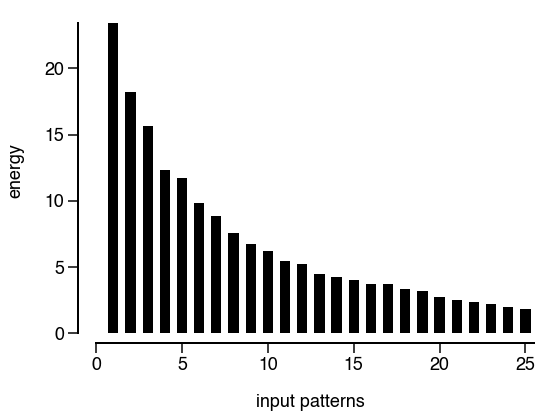

In [5]:
fig = plt.figure(figsize=(8,6))
fig.patch.set_alpha(0)
ax = fig.add_subplot(1,1,1)
noc.plotting.adjust_spines(ax.spines)
ax.set_xlim(-0.5,25.5)
ax.bar(range(1,n+1), height=q_evals, width=0.6,color='black')
ax.set_ylabel("energy")
ax.set_xlabel("input patterns")
plt.show()

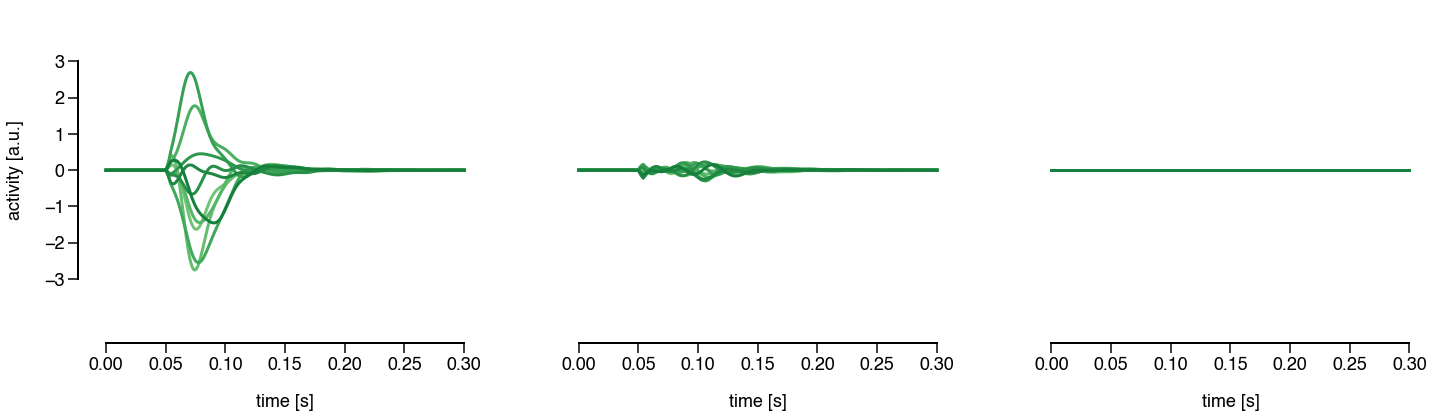

In [7]:
modes = [0, 50, 198]
fig = plt.figure(figsize=(len(modes)*8, 6))
fig.patch.set_alpha(0)
axes = fig.subplots(1,len(modes),sharey=True)
axes[0].set_ylabel("activity [a.u.]")
for i, ax in enumerate(axes):
    if i > 0:
        ax.tick_params(axis='y', which='both',length=0)
        ax.spines["left"].set_visible(False)
    x0 = u[:,modes[i]]
    ts, ys = impulse(a,tau,n,x0,0.3,c)
    noc.plotting.adjust_spines(ax.spines)
    ax.set_ylim(-4.5,4.5)
    ax.set_xlabel("time [s]")
    for j in range(10):
        ax.plot(ts,ys[:,j],color=plt.cm.Greens(0.5+j/30.),linewidth=3)
plt.show()